## Data Structure

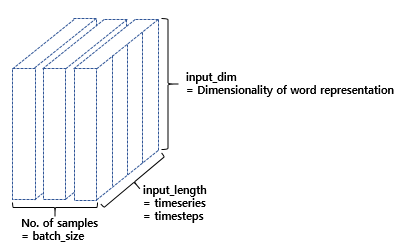

- **batch_size**: 문장의 개수
- **timesteps**: 문장의 길이(문장 내 단어의 개수)
- **input_dim**: 각 텍스트 단어가 벡터로 변환되었을때, 벡터의 차원

예를 들어, ```['나는 치킨을 먹는다','나는 학교에 간다']```의 경우, ```batch_size=2```, ```timesteps=3```이다. input_dim은 설계자의 임의에 따름.

## RNN

In [4]:
import numpy as np

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN as RNN

In [2]:
model = Sequential() 

# timestep = 2, input_dim = 10, hidden_dim = 3
model.add(RNN(3, input_shape=(2,10)))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn (SimpleRNN)      (None, 3)                 42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [5]:
model = Sequential() 

# timestep = 2, input_dim = 10, hidden_dim = 3, batch_size(number of sentences) = 8
model.add(RNN(3, batch_input_shape=(8,2,10)))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_2 (SimpleRNN)    (8, 3)                    42        
                                                                 
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


In [12]:
train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8],
            [1.0, 3.1, 2.5, 0.7, 1.1],
            [0.3, 2.1, 1.5, 2.1, 0.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape) # batch_size, timesteps, input_dim

(1, 3, 5)


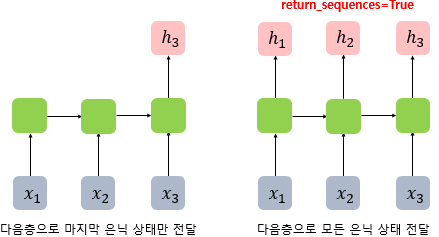

- ```return_sequences=True```: 모든 은닉 상태 반환
- ```return_state=True```: 마지막 은닉 상태 반환

In [16]:
rnn = RNN(2, return_sequences=True, return_state=True)
hidden_states, last_state = rnn(train_X)

In [17]:
print(hidden_states) 

tf.Tensor(
[[[-0.9891621  -0.5375805 ]
  [ 0.01987473  0.8775859 ]
  [ 0.15764187  0.6803448 ]]], shape=(1, 3, 2), dtype=float32)


In [18]:
print(last_state) # hidden_states의 마지막 행과 같은 값

tf.Tensor([[0.15764187 0.6803448 ]], shape=(1, 2), dtype=float32)


## Deep RNN

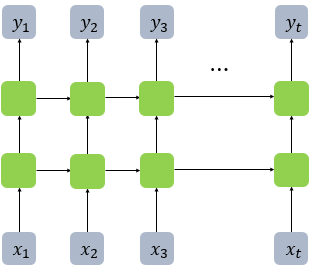

- RNN layer가 2층 이상
- 그림에선 마지막 layer도 모든 timestep마다 hidden state를 반환하고 있음, 이를 구현한 코드는 아래와 같음

In [32]:
model = Sequential() 

# timestep = 2, input_dim = 10, hidden_dim = 3
model.add(RNN(3, input_shape=(2,10), return_sequences=True))
model.add(RNN(3, return_sequences=True))

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_8 (SimpleRNN)    (None, 2, 3)              42        
                                                                 
 simple_rnn_9 (SimpleRNN)    (None, 2, 3)              21        
                                                                 
Total params: 63
Trainable params: 63
Non-trainable params: 0
_________________________________________________________________


## LSTM

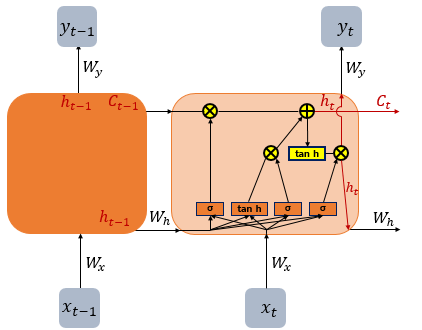

In [19]:
from tensorflow.keras.layers import LSTM

In [22]:
lstm = LSTM(2, return_sequences=True, return_state=True)
hidden_state, last_state, last_cell_state = lstm(train_X)

In [25]:
print(hidden_state) # batch_size, timesteps, hidden_dim

tf.Tensor(
[[[0.10704654 0.14733501]
  [0.07392829 0.27780876]
  [0.15311386 0.33580977]]], shape=(1, 3, 2), dtype=float32)


In [27]:
print(last_state) # hidden_state의 마지막 행과 같음

tf.Tensor([[0.15311386 0.33580977]], shape=(1, 2), dtype=float32)


In [28]:
print(last_cell_state) # cell_state

tf.Tensor([[0.17028742 0.68324995]], shape=(1, 2), dtype=float32)


## GRU

In [29]:
from tensorflow.keras.layers import GRU

In [30]:
model = Sequential() 

# timestep = 2, input_dim = 10, hidden_dim = 3
model.add(GRU(3, input_shape=(2,10)))
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 3)                 135       
                                                                 
Total params: 135
Trainable params: 135
Non-trainable params: 0
_________________________________________________________________


## Bidrectional

In [44]:
from tensorflow.keras.layers import Bidirectional

train_X = [[[0.1, 4.2, 1.5, 1.1, 2.8],
            [1.0, 3.1, 2.5, 0.7, 1.1],
            [0.3, 2.1, 1.5, 2.1, 0.1],
            [1.0, 3.1, 2.5, 0.7, 1.1]]]
train_X = np.array(train_X, dtype=np.float32)
print(train_X.shape) # batch_size, timesteps, input_dim

(1, 4, 5)


In [45]:
k_init = tf.keras.initializers.Constant(value=0.1)
b_init = tf.keras.initializers.Constant(value=0)
r_init = tf.keras.initializers.Constant(value=0.1)

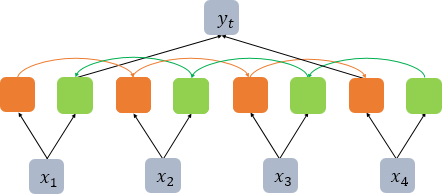

In [46]:
bilstm = Bidirectional(LSTM(3, return_sequences=False, return_state=True, 
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [50]:
print(hidden_states) # concat(forward_h, backward_h)
print(forward_h) # forward hidden state(주황색)의 마지막 시점 state
print(backward_h) # forward hidden state(초록색)의 첫 시점 state

tf.Tensor([[0.6886291 0.6886291 0.6886291 0.7158482 0.7158482 0.7158482]], shape=(1, 6), dtype=float32)
tf.Tensor([[0.6886291 0.6886291 0.6886291]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.7158482 0.7158482 0.7158482]], shape=(1, 3), dtype=float32)


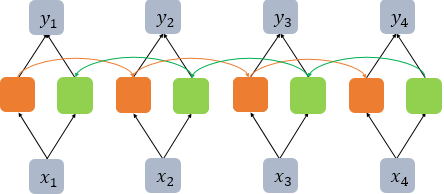

In [51]:
bilstm = Bidirectional(LSTM(3, return_sequences=True, return_state=True, 
                            kernel_initializer=k_init, bias_initializer=b_init, recurrent_initializer=r_init))
hidden_states, forward_h, forward_c, backward_h, backward_c = bilstm(train_X)

In [52]:
print(hidden_states) # hidden state of all timestep / concat(forward, backward)
print(forward_h) # forward hidden state(주황색)의 마지막 시점 state
print(backward_h) # forward hidden state(초록색)의 첫 시점 state

tf.Tensor(
[[[0.35906473 0.35906473 0.35906473 0.7158482  0.7158482  0.7158482 ]
  [0.55111325 0.55111325 0.55111325 0.61729074 0.61729074 0.61729074]
  [0.59115744 0.59115744 0.59115744 0.44824886 0.44824886 0.44824886]
  [0.6886291  0.6886291  0.6886291  0.31113365 0.31113365 0.31113365]]], shape=(1, 4, 6), dtype=float32)
tf.Tensor([[0.6886291 0.6886291 0.6886291]], shape=(1, 3), dtype=float32)
tf.Tensor([[0.7158482 0.7158482 0.7158482]], shape=(1, 3), dtype=float32)


In [63]:
print(hidden_states[:,0,3:]== backward_h)
print(hidden_states[:,-1,:3]== forward_h)

tf.Tensor([[ True  True  True]], shape=(1, 3), dtype=bool)
tf.Tensor([[ True  True  True]], shape=(1, 3), dtype=bool)


## 실습_Word prediction
- 교사 강요를 통해 학습

In [64]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical

In [65]:
text = """경마장에 있는 말이 뛰고 있다\n
그의 말이 법이다\n
가는 말이 고와야 오는 말이 곱다\n"""

In [72]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])

In [105]:
sequences = []
for t in text.split('\n'):
    if t != '':
        sequence = tokenizer.texts_to_sequences([t])[0]
        for i in range(1,len(sequence)):
            sequences.append(sequence[0:i+1])   

In [106]:
sequences

[[2, 3],
 [2, 3, 1],
 [2, 3, 1, 4],
 [2, 3, 1, 4, 5],
 [6, 1],
 [6, 1, 7],
 [8, 1],
 [8, 1, 9],
 [8, 1, 9, 10],
 [8, 1, 9, 10, 1],
 [8, 1, 9, 10, 1, 11]]

In [112]:
# word: index
word_to_index = tokenizer.word_index

# index: word
index_to_word = dict()
for word, index in word_to_index.items():
    index_to_word[index]=word

In [115]:
for sequence in sequences:
    for index in sequence:
        print(index_to_word[index], end=' ')
    print()

경마장에 있는 
경마장에 있는 말이 
경마장에 있는 말이 뛰고 
경마장에 있는 말이 뛰고 있다 
그의 말이 
그의 말이 법이다 
가는 말이 
가는 말이 고와야 
가는 말이 고와야 오는 
가는 말이 고와야 오는 말이 
가는 말이 고와야 오는 말이 곱다 


In [118]:
vocab_size = max(word_to_index.values())+1 # padding을 위한 0 고려

In [123]:
padded = pad_sequences(sequences, maxlen=6)
padded, padded.shape

(array([[ 0,  0,  0,  0,  2,  3],
        [ 0,  0,  0,  2,  3,  1],
        [ 0,  0,  2,  3,  1,  4],
        [ 0,  2,  3,  1,  4,  5],
        [ 0,  0,  0,  0,  6,  1],
        [ 0,  0,  0,  6,  1,  7],
        [ 0,  0,  0,  0,  8,  1],
        [ 0,  0,  0,  8,  1,  9],
        [ 0,  0,  8,  1,  9, 10],
        [ 0,  8,  1,  9, 10,  1],
        [ 8,  1,  9, 10,  1, 11]]),
 (11, 6))

In [126]:
X = padded[:,:-1]
y = padded[:,-1]

In [127]:
X.shape, y.shape

((11, 5), (11,))

In [130]:
y = to_categorical(y)

In [133]:
batch_size = 11
timesteps = 5
vocab_size = 12 # input dim before embedding
embedding_dim = 10
hidden_dim = 32

In [132]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN

단어 집합의 크기가 5일 때 각 단어에 정수 1, 2, 3, 4, 5가 부여되었다고 해봅시다. 그러면 임베딩 테이블은 5개의 행을 가지게 될 것입니다. 숫자 3에 대한 원 핫 벡터는 [0 0 1 0 0]입니다. 이 원-핫 벡터를 임베딩 테이블에다가 곱하면 테이블 룩업 연산을 통해 세번째 벡터가 리턴됩니다. 하지만 사실 생각해보면 원-핫 인코딩할 필요없이 애초에 단어 번호가 3이므로 그냥 해당 테이블에서 3번 벡터를 가져오면 됐을 일입니다. 결론적으로 원-핫 인코딩하고 임베딩 층을 통과시키는 것과 각 단어를 정수로 바꾼 후에 임베딩 층을 통과시키는 것은 어차피 결과가 같습니다. 그래서 케라스에서는 모든 단어를 정수 인코딩한 것을 굳이 원-핫 인코딩을 하고나서 임베딩 층을 통과시키는 것이 아니라 정수 인코딩한 값을 그냥 임베딩 층으로 바로 통과시키도록 합니다. 이는 사전 훈련된 임베딩 챕터에서 설명되어져 있습니다. 테이블 룩업에 대한 설명은 https://wikidocs.net/45609 에 설명되어져 있습니다.

In [142]:
model = Sequential()

model.add(Embedding(vocab_size, embedding_dim))
model.add(RNN(hidden_dim))
model.add(Dense(vocab_size, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, None, 10)          120       
                                                                 
 simple_rnn_15 (SimpleRNN)   (None, 32)                1376      
                                                                 
 dense_5 (Dense)             (None, 12)                396       
                                                                 
Total params: 1,892
Trainable params: 1,892
Non-trainable params: 0
_________________________________________________________________


In [143]:
model.fit(X,y,epochs=200,verbose=0)

In [144]:
def sentence_generation(model, tokenizer, current_word, n): # 모델, 토크나이저, 현재 단어, 반복할 횟수
    init_word = current_word
    sentence = ''

    # n번 반복
    for _ in range(n):
        # 현재 단어에 대한 정수 인코딩과 패딩
        encoded = tokenizer.texts_to_sequences([current_word])[0]
        encoded = pad_sequences([encoded], maxlen=5, padding='pre')
        # 입력한 X(현재 단어)에 대해서 Y를 예측하고 Y(예측한 단어)를 result에 저장.
        result = model.predict(encoded, verbose=0)
        result = np.argmax(result, axis=1)

        for word, index in tokenizer.word_index.items(): 
            # 만약 예측한 단어와 인덱스와 동일한 단어가 있다면 break
            if index == result:
                break

        # 현재 단어 + ' ' + 예측 단어를 현재 단어로 변경
        current_word = current_word + ' '  + word

        # 예측 단어를 문장에 저장
        sentence = sentence + ' ' + word

    sentence = init_word + sentence
    return sentence

In [149]:
print(sentence_generation(model, tokenizer, '경마장에', 4))

경마장에 있는 말이 뛰고 있다


## 실습_Character prediction

In [ ]:
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", filename="11-0.txt")

f = open('11-0.txt', 'rb')
sentences = []
for sentence in f: # 데이터로부터 한 줄씩 읽는다.
    sentence = sentence.strip() # strip()을 통해 \r, \n을 제거한다.
    sentence = sentence.lower() # 소문자화.
    sentence = sentence.decode('ascii', 'ignore') # \xe2\x80\x99 등과 같은 바이트 열 제거
    if len(sentence) > 0:
        sentences.append(sentence)
f.close()